In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
#load the data

data = pd.read_csv('E:\DataScience\Cars\Cardiovascular\cardio_train.csv',sep = ";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# Get the number of rows and number of columns
data.shape

(70000, 13)

In [7]:
#Check the null values
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Get a count of the number of patients with a cardiovascular disease and without
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [13]:
data['years'] = (data['age']/365).round(0)
data['years'] = pd.to_numeric(data['years'],downcast='integer')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


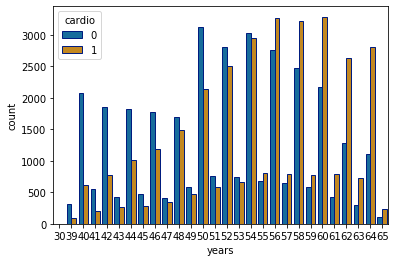

In [14]:
sns.countplot(x = 'years', hue = 'cardio',data=data,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

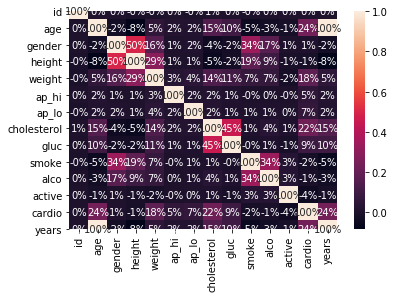

In [15]:
#checking correlation of the data
import matplotlib.pyplot as plt
sns.heatmap(data.corr(),annot=True,fmt='.0%')

In [20]:
# remove the id column and had also removed the year column
data = data.drop('id',axis=1)

In [21]:
#split the data into feature data and target data.

X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [22]:
#Split the data into training and test data set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [24]:
#scale the data:The values of the data will be between 0 and 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
#Use RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [27]:
#Check for accuracy on training data
model = forest
model.score(X_train,Y_train)

0.979904761904762

In [35]:
#check for accuracy on test data

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,model.predict(X_test))

True_Negative = cm[0][0]
True_Positive = cm[1][1]
False_Negative = cm[1][0]
False_Positive = cm [0][1]

#prints out the confusion matrix
print(cm)  


[[6589 2020]
 [3349 5542]]


In [36]:
Model_Accuracy = (True_Positive + True_Negative )/(True_Positive + True_Negative + False_Negative + False_Positive)

print("Model Test Accuracy :",  Model_Accuracy)

Model Test Accuracy : 0.6932
